# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>


## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


# 1.1 Reading Data

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier
##from sklearn import cross_validation
from sklearn.metrics import roc_auc_score
##from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
## os.chdir('C:/Users/kingsubham27091995/Desktop/AppliedAiCouse/DonorsChoose')
import time
from scipy.sparse import hstack

In [2]:
project_data = pd.read_csv('c:\\train_data.csv',nrows = 50000)
resource_data = pd.read_csv('c:\\resources.csv')

In [3]:
print("Number of points in train data", project_data.shape)
print('_ '*35)
print("The attribute Names",project_data.columns.values)
#project_data.head(20)

Number of points in train data (50000, 17)
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
The attribute Names ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of points in resource data :", resource_data.shape)
print("attributes in resource data :", resource_data.columns.values)
resource_data.head(2)

Number of points in resource data : (1541272, 4)
attributes in resource data : ['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [5]:
def preprocessing_catogories(Datafile,AttributeName,ReplaceName):
    categories = list(Datafile[AttributeName].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
    cat_list = []
    for CurrentRow in tqdm(categories):
        temp = ""
        # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for word in CurrentRow.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in word.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                word=word.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            word = word.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=word.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        cat_list.append(temp.strip())

    # Appending Cleaned Attribute list and removing the old attribute
    Datafile[ReplaceName]=cat_list
    Datafile.drop([AttributeName],axis=1,inplace=True)
    
    
    # counting the categories and sorting newly created list 
    my_counter = Counter()
    for word in tqdm(Datafile[ReplaceName].values):
        my_counter.update(word.split())
    
    cat_list = dict(my_counter)
    sorted_result = dict(sorted(cat_list.items(),key=lambda kv:kv[1]))
    return  sorted_result
 
    

In [6]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    # \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
    
    phrase = phrase.replace('\\r', ' ')
    phrase = phrase.replace('\\"', ' ')
    phrase = phrase.replace('\\n', ' ')
    
    #remove spacial character: https://stackoverflow.com/a/5843547/4084039
    phrase = re.sub('[^A-Za-z0-9]+', ' ', phrase)
    phrase = re.sub('nannan','', phrase)
    return phrase.strip()

In [7]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [8]:
def preprocessing_text(data):
    # Combining all the above statemennts 
    preprocessed_essays = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = re.sub('nannan','', sent)
    # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

### Preprocessing project_grade_categories

In [9]:
data = project_data['project_grade_category']
project_data.drop(['project_grade_category'],axis=1,inplace=True)

In [10]:
project_grade_category = []
for ele in data:
    project_grade_category.append(ele.replace(" ","_"))
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_6-8', 'Grades_6-8', 'Grades_PreK-2', 'Grades_PreK-2']

In [11]:
project_data['project_grade_category']=project_grade_category
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime         project_subject_categories  \
0           IN        2016-12-05 13:43:57                Literacy & Language   
1           FL        2016-10-25 09:22:10  History & Civics, Health & Sports   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category  
0          Grades_PreK-2  
1             Grades_6-8

### Preprocessing project_subject_categories

In [12]:
sorted_cat_dict = preprocessing_catogories(project_data,'project_subject_categories','clean_categories')
project_data.head(2)

100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 424744.81it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime     project_subject_subcategories  \
0           IN        2016-12-05 13:43:57                     ESL, Literacy   
1           FL        2016-10-25 09:22:10  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  
0          Grades_PreK-2             Literacy_Language  
1             Grades_6-8  History_Civics Health_Sports

### Preprocessing project_subject_subcategories

In [13]:
sorted_sub_cat_dict = preprocessing_catogories(project_data,'project_subject_subcategories','clean_subcategories')
project_data.head(2)

100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 414211.34it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  
0                  ESL Literacy  
1  Civics_Government TeamSports

## Text Preprocessing

### Finding number of words in title and appending it to new column
   - This can be used as Numerical Feature for Vectorisation

In [14]:
title_word_count = []
for word in project_data['project_title']:
    title_word_count.append(len(word.split()))

In [15]:
project_data["title_word_count"] = title_word_count
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  
0                  ESL Literacy                 7  
1  Civics_Government TeamSports                 5

In [16]:
# merge two column text dataframe: 
project_data["Essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [17]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                               Essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

### Preprocessing Essay in project_data

In [18]:
preprocessed_essay=preprocessing_text(project_data['Essay'])

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:30<00:00, 1619.76it/s]


In [19]:
# after preprocesing
project_data["clean_essays"] = preprocessed_essay
preprocessed_essay[10000]

'my kids caring curious individuals they pretty much clap time science love figuring world around works they value community overcome economic disadvantages special needs active learners classroom while rural district one largest area even small community mindset knowing helping neighbors our class believes capable effort perseverance great things wi looking set book clubs involve student family every night give reading 20 minutes assignment i would like change assignment 10 minutes family member reading 10 minutes student reading aloud after reading log onto google classroom page submit reflection questions read i choosing two classic books engaging students adults these books personal favorites contributed rich diverse discussions previous classes i think giving family members topics discuss child promote type questioning analysis promote classroom families able discuss books using google classroom post comment features topics i post i able measure involvement many posts family makes

In [20]:
project_data.drop(['Essay'], axis=1, inplace=True)

In [21]:
preprocessed_titles=preprocessing_text(project_data['project_title'])

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 34633.22it/s]


### Finding number of words in the essay and added in as a new column

In [22]:
essay_word_count = []
for words in project_data['clean_essays']:
    essay_word_count.append(len(words.split()))

In [23]:
project_data["essay_word_count"] = essay_word_count
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

  project_grade_category              clean_categories  \
0          Grades_PreK-2             Literacy_Language   
1             Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                        clean_essays  essay_word_count  
0  my students english learners working english s...               160  
1  our students arrive school eager learn they po...               108

### Calculating Sentiment Scores for the Essay Feature

In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
analyser = SentimentIntensityAnalyzer()

In [27]:
## http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html
neg = []
pos = []
neu = []
compound = []

for words in tqdm(project_data["clean_essays"]) :
    Negative = analyser.polarity_scores(words)['neg']
    Positive = analyser.polarity_scores(words)['pos']
    Neutral = analyser.polarity_scores(words)['neu']
    Compound = analyser.polarity_scores(words)['compound']
    neg.append(Negative)
    pos.append(Positive)
    neu.append(Neutral)
    compound.append(Compound)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [05:51<00:00, 142.06it/s]


In [28]:
project_data["pos"] = pos
project_data["neg"] = neg
project_data["neu"] = neu
project_data["compound"] = compound

project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime  \
0           IN        2016-12-05 13:43:57   
1           FL        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

     ...    project_grade_category              clean_categories  \
0    ...             Grades_PreK-2             Literacy_Language   
1    ...                Grades_6-8  History_Civics Health_Sports   

            clean_subcategories  title_word_count  \
0                  ESL Literacy                 7   
1  Civics_Government TeamSports                 5   

                                        clean_essays essay_word_count    pos  \
0  my students english learners working english s...              160  0.144   
1  our students arrive school eager learn they po...              108  0.285   

     neg    neu  compound  
0  0.012  0.843    0.9694  
1  0.049  0.667    0.9856  

[2 rows x 24 columns]

### Spliting Project_Data into Train,Test,CV Data sets

In [29]:
#Splitting train and test data from the original data
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],
                                                    test_size =0.33, stratify = project_data['project_is_approved'])


In [30]:
# printing some random reviews
print(X_train['clean_essays'].values[0])
print("="*50)
print(X_train['clean_essays'].values[500])
print("="*50)
print(X_train['clean_essays'].values[1000])
print("="*50)
print(X_train['clean_essays'].values[10000])
print("="*50)
print(X_train['clean_essays'].values[20000])
print("="*50)

i teach diverse area bay hard working kindergartners come school everyday ready learn i love students they hardworking eager learners they come diverse backgrounds including various ethnicities diverse socioeconomic backgrounds i use whole brain teaching strategies classroom students constantly engaged learning sharing ideas i want students essentials need able love life every day in classroom students read everyday we loving learning read i think students would even excited reading able option listening center i think students would enjoy benefit listening center able listen stories without interruption others working classroom having listening center promote sustained silent reading time build reading stamina integrate technology reading allow students time enjoying favorite audible stories
room 121 home my students come homes not always feel safe not always get fed not always receive support schoolwork in room students feel safe home away home they get food get academic support impo

In [31]:
sent = decontracted(X_train['clean_essays'].values[500])
print(sent)
print("="*50)

room 121 home my students come homes not always feel safe not always get fed not always receive support schoolwork in room students feel safe home away home they get food get academic support importantly get teacher paraprofessional care despite emotional disability student able achieve academic personal success my students need support controlling emotions they working strategies express positive negative feelings constructive ways their dedication academic personal goals astounding my students need bean bag chairs help use strategies help deescalate high behavior situations we lucky enough time away room inside classroom students taught use room feel getting angry behavioral outburst behavioral outburst your generous donation help students build coping skills help successful classroom with options make positive impacts behaviors able concentrate learning time task


### Preprocessing Train Dataset(Essay Featrues)

In [32]:
X_train['clean_essays']

33830    i teach diverse area bay hard working kinderga...
1144     the students our school awesome i try instill ...
15562    my students come wide variety backgrounds make...
761      my students diverse learning needs receive muc...
47116    diverse fitting word describe students i serve...
26669    i wonderful group students year they course un...
31300    my students amazing kiddos they bright energet...
36941    my school located small rural town near coast ...
13969    i teach 6 1 1 self contained classroom the maj...
29380    i not imagine teaching anything pre k special ...
31954    rps 205 high concentration poverty students wi...
35171    i work high needs poverty school district new ...
7579     i work group wonderful second grade students t...
1939     the valley school southern oregon montessori b...
4812     at school strive inclusive atmosphere among 40...
661      mr pierre i ready learn one 4th grade students...
39242    our school urban area county virginia while pr.

## 1.4 Preparing data for models

In [33]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'project_grade_category', 'clean_categories', 'clean_subcategories',
       'title_word_count', 'clean_essays', 'essay_word_count', 'pos', 'neg',
       'neu', 'compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Vectorizing Text data

### Bag of words on preprocessed_essay; Train, Test

In [34]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow_train = vectorizer.fit_transform(X_train["clean_essays"])
text_bow_test = vectorizer.transform(X_test["clean_essays"])

#print(vectorizer.get_feature_names())
ArNa_essay=vectorizer.get_feature_names()

print("Shape of matrix after one hot encodig for X_train  ",text_bow_train.shape)
print("Shape of matrix after one hot encodig for X_test   ",text_bow_test.shape)


Shape of matrix after one hot encodig for X_train   (33500, 10460)
Shape of matrix after one hot encodig for X_test    (16500, 10460)


###  Bag of words on project_title; Train, Test

In [35]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow_train = vectorizer.fit_transform(X_train['project_title'])
title_bow_test = vectorizer.transform(X_test['project_title'])

ArNa_project_title=vectorizer.get_feature_names()

print("Shape of matrix after one hot encodig for X_train  ",title_bow_train.shape)
print("Shape of matrix after one hot encodig for X_test   ",title_bow_test.shape)


Shape of matrix after one hot encodig for X_train   (33500, 1641)
Shape of matrix after one hot encodig for X_test    (16500, 1641)


### TFIDF vectorizer on preprocessed_essay; Train, Test

In [36]:
vectorizer = CountVectorizer(min_df=10)
text_tfidf_train = vectorizer.fit_transform(X_train["clean_essays"])
text_tfidf_test = vectorizer.transform(X_test["clean_essays"])

ArNa_tfidf_essay=vectorizer.get_feature_names()

print("Shape of matrix after one hot encoding for X_train ",text_tfidf_train.shape)
print("Shape of matrix after one hot encoding for X_test  ",text_tfidf_test.shape)


Shape of matrix after one hot encoding for X_train  (33500, 10460)
Shape of matrix after one hot encoding for X_test   (16500, 10460)


### TFIDF vectorizer on project title; Train, Test

In [37]:
vectorizer = CountVectorizer(min_df=10)
title_tfidf_train = vectorizer.fit_transform(X_train['project_title'])
title_tfidf_test = vectorizer.transform(X_test['project_title'])

ArNa_tfidf_project_title=vectorizer.get_feature_names()

print("Shape of matrix after one hot encoding X_train ",title_tfidf_train.shape)
print("Shape of matrix after one hot encoding X_test  ",title_tfidf_test.shape)


Shape of matrix after one hot encoding X_train  (33500, 1641)
Shape of matrix after one hot encoding X_test   (16500, 1641)


### Using Pretrained Models: Avg W2V on Essay; Train, Test

In [38]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [39]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('c:\\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [40]:
# average Word2Vec
# compute average word2vec for each review.

def preprocessing_avg_w2v_vectors(DataFile):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(DataFile): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)

    print(len(avg_w2v_vectors))
    print(len(avg_w2v_vectors[0]))
    print("="*50)
    return avg_w2v_vectors

In [41]:
avg_w2v_vectors_train = preprocessing_avg_w2v_vectors(X_train['clean_essays'])
time.sleep(0.5)
avg_w2v_vectors_test = preprocessing_avg_w2v_vectors(X_test['clean_essays'])


100%|██████████████████████████████████████████████████████████████████████████| 33500/33500 [00:08<00:00, 3938.13it/s]


33500
300


100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:04<00:00, 4031.90it/s]

16500
300


###  AVG W2V on project_title; Train, Test

In [42]:
avg_w2v_vectors_titles_train = preprocessing_avg_w2v_vectors(X_train['project_title'])
time.sleep(0.5)
avg_w2v_vectors_titles_test = preprocessing_avg_w2v_vectors(X_test['project_title'])


100%|████████████████████████████████████████████████████████████████████████| 33500/33500 [00:00<00:00, 126753.40it/s]


33500
300


100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 137862.24it/s]

16500
300


In [43]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [44]:
def preprocessed_tfidf_w2v_vectors(DataFile):
    # average Word2Vec
    # compute average word2vec for each review.
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(DataFile): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
             vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    print("="*50)
    return tfidf_w2v_vectors

### TFIDF weighted W2V on preprocessed essay; Train, Test

In [45]:
tfidf_w2v_vectors_train  = preprocessed_tfidf_w2v_vectors(X_train['clean_essays'])
time.sleep(0.5)
tfidf_w2v_vectors_test  = preprocessed_tfidf_w2v_vectors(X_test['clean_essays'])


100%|███████████████████████████████████████████████████████████████████████████| 33500/33500 [01:08<00:00, 490.03it/s]


33500
300


100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [00:33<00:00, 499.71it/s]

16500
300


### TFIDF weighted W2V on project_title; Train, Test

In [46]:
tfidf_w2v_vectors_titles_train   = preprocessed_tfidf_w2v_vectors(X_train['project_title'])
time.sleep(0.5)
tfidf_w2v_vectors_titles_test   = preprocessed_tfidf_w2v_vectors(X_test['project_title'])


100%|█████████████████████████████████████████████████████████████████████████| 33500/33500 [00:00<00:00, 62203.06it/s]


33500
300


100%|█████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 86604.41it/s]

16500
300


### Vectorizing Numerical features

### Price Feature

In [47]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
#Now join price data to Train,Test and Cross Validation Data
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')


In [48]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = Normalizer()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(price_standardized_train.shape, y_train.shape)
print(price_standardized_test.shape, y_test.shape)

After Column Standardisation: 
(33500, 1) (33500,)
(16500, 1) (16500,)


### Quantity Feature

In [49]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = Normalizer()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
quantity_standardized_train = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
quantity_standardized_test = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(quantity_standardized_train.shape, y_train.shape)
print(quantity_standardized_test.shape, y_test.shape)

After Column Standardisation: 
(33500, 1) (33500,)
(16500, 1) (16500,)


### Number of previously proposed project by teacher 

In [50]:

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

ppt_scalar = Normalizer()
ppt_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
ppt_standardized_train = ppt_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
ppt_standardized_test = ppt_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(ppt_standardized_train.shape, y_train.shape)
print(ppt_standardized_test.shape, y_test.shape)

After Column Standardisation: 
(33500, 1) (33500,)
(16500, 1) (16500,)


### Title Word Count

In [51]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

twc_scalar = Normalizer()
twc_scalar.fit(X_train['title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
twc_standardized_train = twc_scalar.transform(X_train['title_word_count'].values.reshape(-1, 1))
twc_standardized_test = twc_scalar.transform(X_test['title_word_count'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(twc_standardized_train.shape, y_train.shape)
print(twc_standardized_test.shape, y_test.shape)

After Column Standardisation: 
(33500, 1) (33500,)
(16500, 1) (16500,)


### Essay Word Count

In [52]:

# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler,Normalizer
import warnings
warnings.filterwarnings("ignore")

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

ewc_scalar = Normalizer()
ewc_scalar.fit(X_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above mean and variance.
ewc_standardized_train = ewc_scalar.transform(X_train['essay_word_count'].values.reshape(-1, 1))
ewc_standardized_test = ewc_scalar.transform(X_test['essay_word_count'].values.reshape(-1, 1))

print("After Column Standardisation: ")
print(ewc_standardized_train.shape, y_train.shape)
print(ewc_standardized_test.shape, y_test.shape)

After Column Standardisation: 
(33500, 1) (33500,)
(16500, 1) (16500,)


### Essay Sentiments - positives, negatives, neural and compound

In [53]:
def essay_sentiments(Data):
    # check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
    # standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    from sklearn.preprocessing import StandardScaler,Normalizer
    # price_standardized = standardScalar.fit(project_data['price'].values)
    # this will rise the error
    # ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
    # Reshape your data either using array.reshape(-1, 1)

    scalar = Normalizer()
    scalar.fit(X_train[Data].values.reshape(-1,1)) # finding the mean and standard deviation of this data
   
    # Now standardize the data with above mean and variance.
    standardized_train = scalar.transform(X_train[Data].values.reshape(-1, 1))
    standardized_test = scalar.transform(X_test[Data].values.reshape(-1, 1))
    
    print("After Column Standardisation: " + Data)
    print(standardized_train.shape, y_train.shape)
    print(standardized_test.shape, y_test.shape)
    print('='*30)
    
    return standardized_train, standardized_test

In [54]:
es_list = ['pos','neg','neu','compound']
pos_standardized_train, pos_standardized_test =  essay_sentiments(es_list[0])
neg_standardized_train, neg_standardized_test =  essay_sentiments(es_list[1])
neu_standardized_train, neu_standardized_test =  essay_sentiments(es_list[2])
com_standardized_train, com_standardized_test =  essay_sentiments(es_list[3])

After Column Standardisation: pos
(33500, 1) (33500,)
(16500, 1) (16500,)
After Column Standardisation: neg
(33500, 1) (33500,)
(16500, 1) (16500,)
After Column Standardisation: neu
(33500, 1) (33500,)
(16500, 1) (16500,)
After Column Standardisation: compound
(33500, 1) (33500,)
(16500, 1) (16500,)


### Response Coding for Categorical Data

In [55]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing

def get_gv_fea_dict(alpha, feature, Data):
   
    value_count = Data[feature].value_counts()
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 2 dimensional vector
        vec = []
        for k in range(1,3):
            
            cls_cnt = Data.loc[(Data['project_is_approved']==k) & (Data[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))

        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, Data):
    
    gv_dict = get_gv_fea_dict(alpha, feature, Data)
    # value_count is similar in get_gv_fea_dict
    value_count = Data[feature].value_counts()
    
    gv_fea = []
   
    for index, row in Data.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

### School State 

In [56]:
# alpha is used for laplace smoothing
alpha = 1

train_school_state = np.array(get_gv_feature(alpha, "school_state", X_train))
test_school_state = np.array(get_gv_feature(alpha, "school_state", X_test))
print(train_school_state.shape)
print(test_school_state.shape)
train_school_state

(33500, 2)
(16500, 2)


array([[0.85600503, 0.002096  ],
       [0.83143219, 0.01267427],
       [0.84267241, 0.02155172],
       ...,
       [0.79209699, 0.00449035],
       [0.87100894, 0.01277139],
       [0.84545455, 0.09090909]])

### Clean Categories

In [57]:
#alpha is used for laplace smoothing
alpha = 1

train_clean_categories = np.array(get_gv_feature(alpha, "clean_categories", X_train))
test_clean_categories = np.array(get_gv_feature(alpha, "clean_categories", X_test))
print(train_clean_categories.shape)
print(test_clean_categories.shape)

(33500, 2)
(16500, 2)


### Clean Sub-Categories

In [58]:
#alpha is used for laplace smoothing
alpha = 1

train_clean_subcategories = np.array(get_gv_feature(alpha, "clean_subcategories", X_train))
test_clean_subcategories = np.array(get_gv_feature(alpha, "clean_subcategories", X_test))
print(train_clean_subcategories.shape)
print(test_clean_subcategories.shape)

(33500, 2)
(16500, 2)


### project_grade_category

In [59]:
# alpha is used for laplace smoothing
alpha = 1

train_project_grade_category = np.array(get_gv_feature(alpha, "project_grade_category", X_train))
test_project_grade_category = np.array(get_gv_feature(alpha, "project_grade_category", X_test))
print(train_project_grade_category.shape)
print(test_project_grade_category.shape)

(33500, 2)
(16500, 2)


### Teacher Prefix

In [60]:
# alpha is used for laplace smoothing
alpha = 1

train_teacher_prefix = np.array(get_gv_feature(alpha, "teacher_prefix", X_train))
test_teacher_prefix = np.array(get_gv_feature(alpha, "teacher_prefix", X_test))
print(train_teacher_prefix.shape)
print(test_teacher_prefix.shape)

(33500, 2)
(16500, 2)


#### Merging all the above features
   

 - We need to merge all the numerical vectors i.e categorical, text, numerical vectors

In [61]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#Data_train = hstack((train_clean_categories, train_clean_subcategories, train_school_state, train_project_grade_category,
#                     train_teacher_prefix, price_standardized_train, quantity_standardized_train, ppt_standardized_train, twc_standardized_train,
#                     ewc_standardized_train, pos_standardized_train, neg_standardized_train, neu_standardized_train, com_standardized_train)).tocsr()
#Data_test = hstack((test_clean_categories, test_clean_subcategories, test_school_state, test_project_grade_category, 
#                    test_teacher_prefix,price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
#                    ewc_standardized_test, pos_standardized_test, neg_standardized_test, neu_standardized_test, com_standardized_test)).tocsr()

In [62]:
#Sen_train = hstack((pos_standardized_train,neg_standardized_train, neu_standardized_train,com_standardized_train)).tocsr()
#Sen_test = hstack((pos_standardized_test,neg_standardized_test, neu_standardized_test,com_standardized_test)).tocsr()
#Sen_cv = hstack((pos_standardized_cv,neg_standardized_cv, neu_standardized_cv,com_standardized_cv)).tocsr()

<h1>RF</h1>

### Finding the best hyper parameter for maximum AUC value:

### Placing all the repeated code here 

In [63]:
def batch_predict(Model,Data):
    #Model=classifier ; Data= training,test data
    
    y_data_pred = []
    RemainingData = Data.shape[0]%1000
    tr_loop = Data.shape[0]-RemainingData
    for ele in range(0,tr_loop,1000):
        y_data_pred.extend(Model.predict_proba(Data[ele:ele+1000])[:,1])
    # we will be predicting for the last data points
    if RemainingData:
        y_data_pred.extend(Model.predict_proba(Data[tr_loop:])[:,1])
    
    return y_data_pred

### Function for finding n_estimators and max_depth; GridSearchCV

In [64]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
sns.set()

def find_Best_Kvalue(X_train_Data,X_test_Data,y_test_Data,y_Train_Data,SearchName):
    
    parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000],
                  'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}  
     
    if SearchName == 'GridSearchCV':
        rf = RandomForestClassifier(class_weight='balanced',min_samples_split=5)
        clf = GridSearchCV(rf,parameters, cv=3, scoring = 'roc_auc',return_train_score=True)
        clf.fit(X_train_Data,y_Train_Data)
      
    max_score = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators',
                                                        'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
        
    fig,ax = plt.subplots(1,2,figsize=(20,6))
    sns.heatmap(max_score.mean_train_score, annot = True, fmt = '.4g',ax=ax[0])
    sns.heatmap(max_score.mean_test_score, annot = True, fmt = '.4g',ax=ax[1])
    ax[0].set_title('Train_Set')
    ax[1].set_title('CV_Set')
    plt.show()
    
    print(clf.best_estimator_)
    #Mean cross_validated score of the best_estimator
    print(clf.score(X_train_Data,y_Train_Data))
    print(clf.score(X_test_Data,y_test_Data))
    result=clf.best_estimator_
    max_depth = result.max_depth
    n_estimator=result.n_estimators
    
    return n_estimator,max_depth
    
    

### Best Model based on max_depth and min_samples_split

In [65]:
def BestModel(X_train_Data,X_test_Data,y_test_Data,y_Train_Data,n_estimator,max_depth):
    
    train_auc = []
    cv_auc = []
    
    parameters = {'n_estimators':[int(n_estimator)],
                  'max_depth':[int(max_depth)]}
   
    rf = RandomForestClassifier(class_weight='balanced')
    clf = GridSearchCV(rf,parameters)
    clf.fit(X_train_Data,y_Train_Data)
       
    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    
    y_train_pred = clf.predict_proba(X_train_Data) [:,1]  
    y_test_pred = clf.predict_proba(X_test_Data)[:,1]
    
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_Train_Data, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test_Data, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title("ROC-AUC")
    plt.grid(True)
    plt.show()
    
    
    return clf, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr

### 2.4.1 Applying RF on BOW,<font color='red'> SET 1</font>

In [67]:
X_tra = hstack((train_clean_categories, train_clean_subcategories, train_school_state, train_project_grade_category,
                train_teacher_prefix, price_standardized_train, quantity_standardized_train, ppt_standardized_train, twc_standardized_train,
                ewc_standardized_train, pos_standardized_train, neg_standardized_train, neu_standardized_train, com_standardized_train,title_bow_train,text_bow_train)).tocsr()
X_te = hstack((test_clean_categories, test_clean_subcategories, test_school_state, test_project_grade_category, 
               test_teacher_prefix,price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
               ewc_standardized_test, pos_standardized_test, neg_standardized_test, neu_standardized_test, com_standardized_test,title_bow_test,text_bow_test)).tocsr()

#y_train = y_train_full
#y_test = y_test_full


In [68]:
'''X_tra = X_tra_full[0:1000,0:100]
X_te = X_te_full[0:1000,0:100]

y_train = y_train_full[0:1000]
y_test = y_test_full[0:1000]
'''

'X_tra = X_tra_full[0:1000,0:100]\nX_te = X_te_full[0:1000,0:100]\n\ny_train = y_train_full[0:1000]\ny_test = y_test_full[0:1000]\n'

In [69]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Shape of the Data matrix
(33500, 12120) (33500,)
(16500, 12120) (16500,)


### Confusion Matrix

In [70]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    res_predictions = predictions
    return predictions,res_predictions

### RF using GridsearchCV 

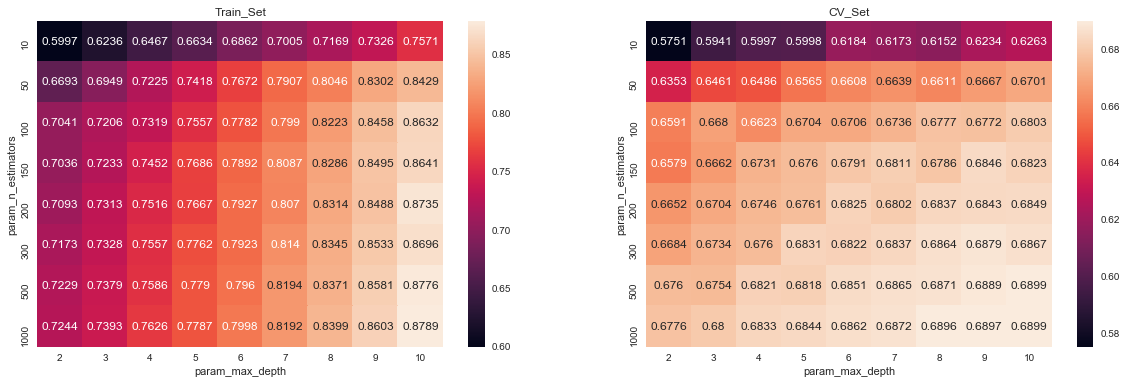

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.8478043157230346
0.6948450362266503


In [71]:
n_estimator,max_depth=find_Best_Kvalue(X_tra,X_te,y_test,y_train,'GridSearchCV')

### Traing the model for best n_estimator and max_depth 

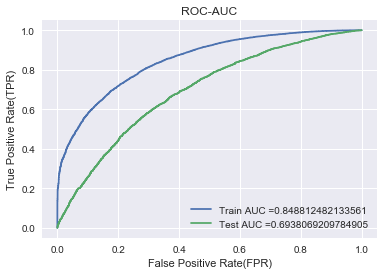

In [72]:
clf1, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_te,y_test,y_train,n_estimator,max_depth)

### Confusion Matrix on Train Set and Test Set

In [73]:
train_con,res_predictions_train = predict(y_train_pred,tr_thresholds,train_fpr,train_tpr)
test_con,res_predictions_test = predict(y_test_pred,tr_thresholds,test_fpr,test_tpr)
con_mat_train = confusion_matrix(y_train,train_con)
con_mat_test = confusion_matrix(y_test,test_con)

the maximum value of tpr*(1-fpr) 0.5770341842347853 for threshold 0.498
the maximum value of tpr*(1-fpr) 0.4170764033231848 for threshold 0.507


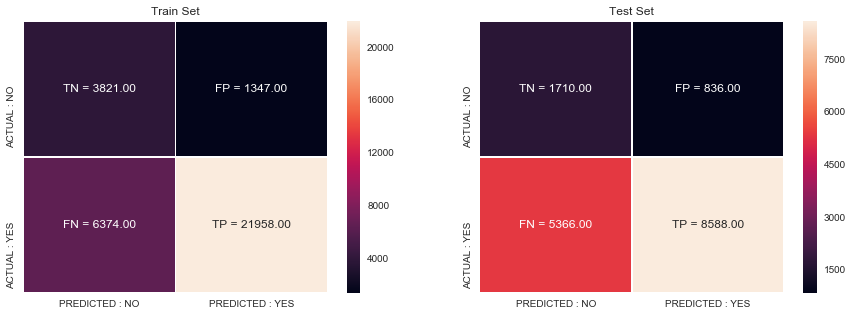

In [74]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_mat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_mat_test.flatten())])).reshape(2,2)
sns.heatmap(con_mat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_mat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

### 2.4.2 Applying RF on TFIDF,<font color='red'> SET 2</font>

In [120]:
X_tra = hstack((train_clean_categories, train_clean_subcategories, train_school_state, train_project_grade_category,
                train_teacher_prefix, price_standardized_train, quantity_standardized_train, ppt_standardized_train, twc_standardized_train,
                ewc_standardized_train, pos_standardized_train, neg_standardized_train, neu_standardized_train, com_standardized_train,title_tfidf_train,text_tfidf_train)).tocsr()
X_te = hstack((test_clean_categories, test_clean_subcategories, test_school_state, test_project_grade_category, 
               test_teacher_prefix,price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
               ewc_standardized_test, pos_standardized_test, neg_standardized_test, neu_standardized_test, com_standardized_test,title_tfidf_test,text_tfidf_test)).tocsr()


In [122]:
train_clean_categories.shape
print(type(title_tfidf_train))

<class 'scipy.sparse.csr.csr_matrix'>


In [82]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Shape of the Data matrix
(33500, 12120) (33500,)
(16500, 12120) (16500,)


### RF using GridsearchCV 

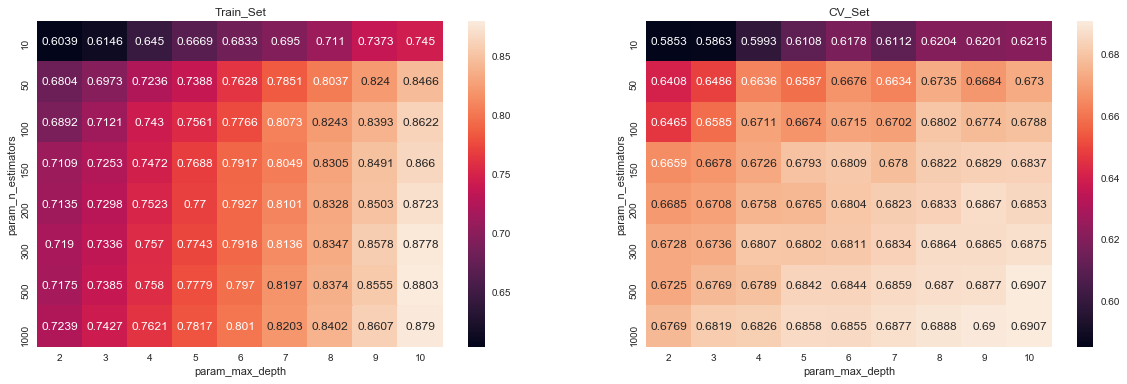

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.8415506215499197
0.6931745266486078


In [83]:
n_estimator,max_depth=find_Best_Kvalue(X_tra,X_te,y_test,y_train,'GridSearchCV')

### Traing the model for best n_estimator and max_depth 

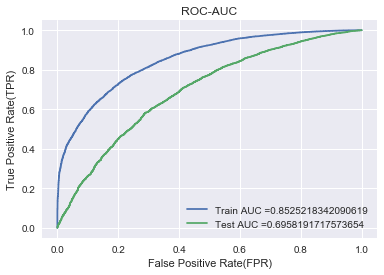

In [84]:
clf1, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_te,y_test,y_train,n_estimator,max_depth)

### Confusion Matrix on Train Set and Test Set

In [85]:
train_con,res_predictions_train = predict(y_train_pred,tr_thresholds,train_fpr,train_tpr)
test_con,res_predictions_test = predict(y_test_pred,tr_thresholds,test_fpr,test_tpr)
con_mat_train = confusion_matrix(y_train,train_con)
con_mat_test = confusion_matrix(y_test,test_con)

the maximum value of tpr*(1-fpr) 0.5859501246607562 for threshold 0.496
the maximum value of tpr*(1-fpr) 0.41688238124120314 for threshold 0.506


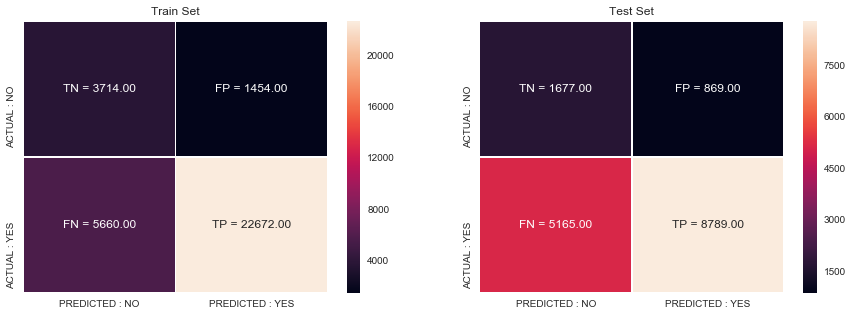

In [86]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_mat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_mat_test.flatten())])).reshape(2,2)
sns.heatmap(con_mat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_mat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

### 2.4.3 Applying RF on AVG W2V,<font color='red'> SET 3</font>

In [132]:
import numpy as np
avg_w2v_vectors_train_arr = np.array(avg_w2v_vectors_train)
avg_w2v_vectors_test_arr = np.array(avg_w2v_vectors_test)

avg_w2v_vectors_titles_train_arr = np.array(avg_w2v_vectors_titles_train)
avg_w2v_vectors_titles_test_arr = np.array(avg_w2v_vectors_titles_test)


X_tra = np.hstack((train_clean_categories, train_clean_subcategories, train_school_state, train_project_grade_category,
                train_teacher_prefix, price_standardized_train, quantity_standardized_train, ppt_standardized_train, twc_standardized_train,
                ewc_standardized_train, pos_standardized_train, neg_standardized_train, neu_standardized_train, com_standardized_train,
                avg_w2v_vectors_titles_train_arr,avg_w2v_vectors_train_arr))
X_te = np.hstack((test_clean_categories, test_clean_subcategories, test_school_state, test_project_grade_category, 
               test_teacher_prefix,price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
               ewc_standardized_test, pos_standardized_test, neg_standardized_test, neu_standardized_test, com_standardized_test,
               avg_w2v_vectors_titles_test_arr,avg_w2v_vectors_test_arr))


In [133]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Shape of the Data matrix
(33500, 619) (33500,)
(16500, 619) (16500,)


### RF using GridsearchCV 

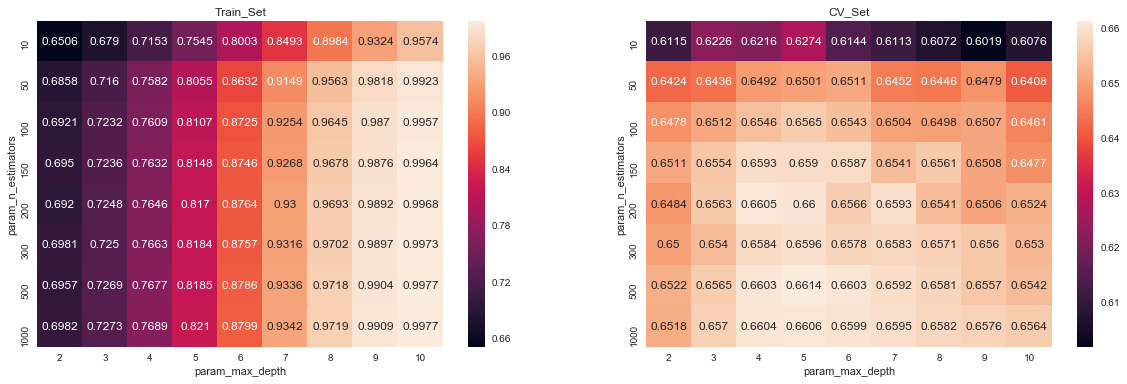

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
0.78131704160768
0.6704422206011651


In [134]:
till = 20000;
n_estimator,max_depth=find_Best_Kvalue(X_tra[:till,:],X_te[:till,:],y_test[:till],y_train[:till],'GridSearchCV')

### Traing the model for best n_estimator and max_depth 

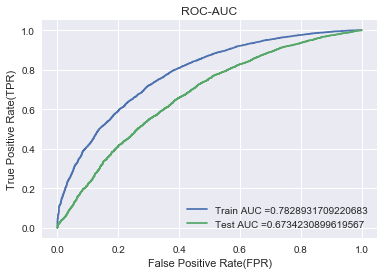

In [135]:
clf1, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra[:till,:],X_te[:till,:],y_test[:till],y_train[:till],n_estimator,max_depth)

### Confusion Matrix on Train Set and Test Set

In [137]:
train_con,res_predictions_train = predict(y_train_pred,tr_thresholds,train_fpr,train_tpr)
test_con,res_predictions_test = predict(y_test_pred,tr_thresholds,test_fpr,test_tpr)
con_mat_train = confusion_matrix(y_train[:till],train_con)
con_mat_test = confusion_matrix(y_test[:till],test_con)

the maximum value of tpr*(1-fpr) 0.5051567794486502 for threshold 0.511
the maximum value of tpr*(1-fpr) 0.39648160531050225 for threshold 0.506


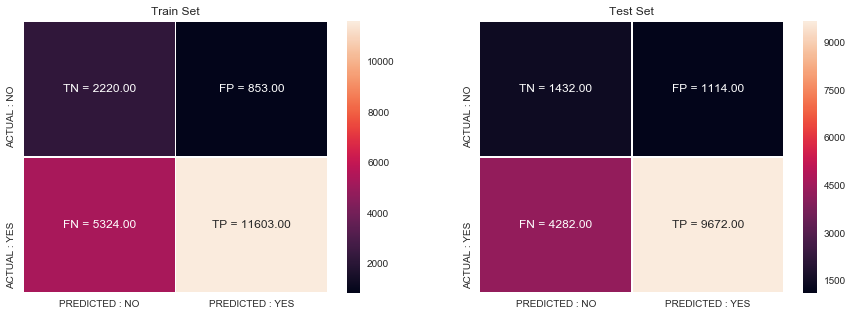

In [138]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_mat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_mat_test.flatten())])).reshape(2,2)
sns.heatmap(con_mat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_mat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

### 2.4.4 Applying RF on TFIDF W2V,<font color='red'> SET 4</font>

In [141]:
import numpy as np
tfidf_w2v_vectors_train_arr = np.array(tfidf_w2v_vectors_train)
tfidf_w2v_vectors_test_arr = np.array(tfidf_w2v_vectors_test)

tfidf_w2v_vectors_titles_train_arr = np.array(tfidf_w2v_vectors_titles_train)
tfidf_w2v_vectors_titles_test_arr = np.array(tfidf_w2v_vectors_titles_test)


X_tra = np.hstack((train_clean_categories, train_clean_subcategories, train_school_state, train_project_grade_category,
                train_teacher_prefix, price_standardized_train, quantity_standardized_train, ppt_standardized_train, twc_standardized_train,
                ewc_standardized_train, pos_standardized_train, neg_standardized_train, neu_standardized_train, com_standardized_train,
                   tfidf_w2v_vectors_titles_train_arr,tfidf_w2v_vectors_train_arr))
X_te = np.hstack((test_clean_categories, test_clean_subcategories, test_school_state, test_project_grade_category, 
               test_teacher_prefix,price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
               ewc_standardized_test, pos_standardized_test, neg_standardized_test, neu_standardized_test, com_standardized_test,
                  tfidf_w2v_vectors_titles_test_arr,tfidf_w2v_vectors_test_arr))


In [143]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Shape of the Data matrix
(33500, 619) (33500,)
(16500, 619) (16500,)


### RF using GridsearchCV 

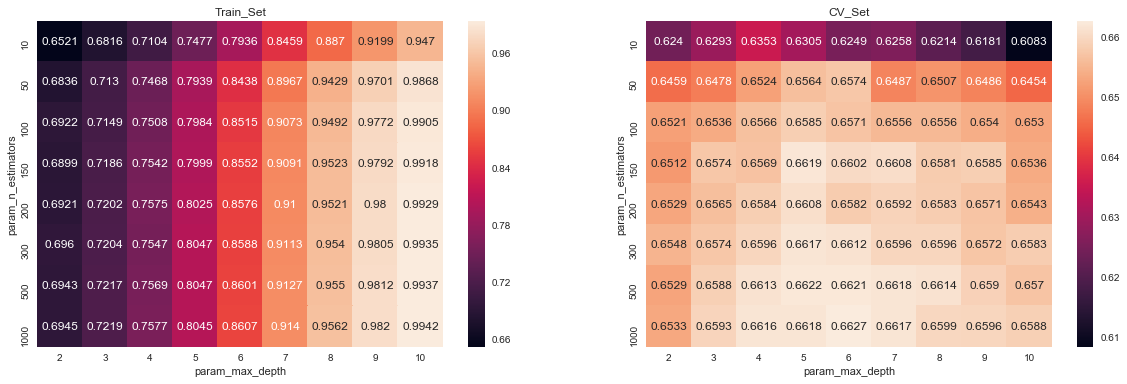

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
0.8206845935988484
0.6739670723725728


In [144]:
till = 20000
n_estimator,max_depth=find_Best_Kvalue(X_tra[:till,:],X_te[:till,:],y_test[:till],y_train[:till],'GridSearchCV')

### Traing the model for best n_estimator and max_depth 

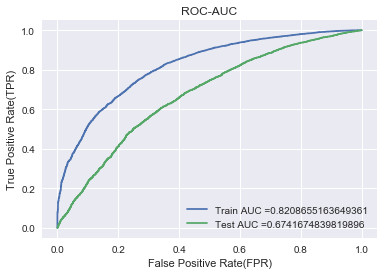

In [145]:
clf1, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra[:till,:],X_te[:till,:],y_test[:till],y_train[:till],n_estimator,max_depth)

### Confusion Matrix on Train Set and Test Set

In [146]:
train_con,res_predictions_train = predict(y_train_pred,tr_thresholds,train_fpr,train_tpr)
test_con,res_predictions_test = predict(y_test_pred,tr_thresholds,test_fpr,test_tpr)
con_mat_train = confusion_matrix(y_train[:till],train_con)
con_mat_test = confusion_matrix(y_test[:till],test_con)

the maximum value of tpr*(1-fpr) 0.5498339753422514 for threshold 0.513
the maximum value of tpr*(1-fpr) 0.4005357463941954 for threshold 0.489


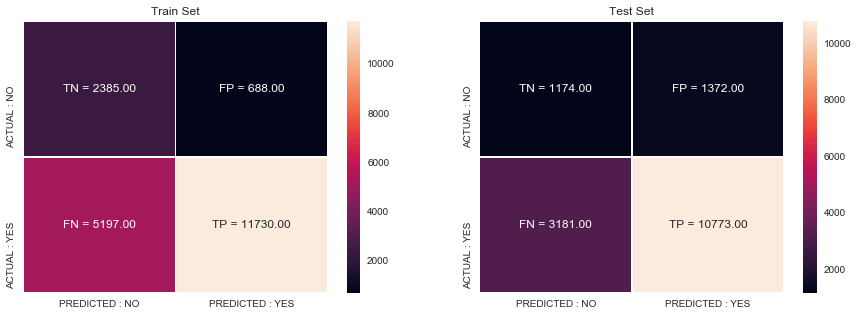

In [147]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_mat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_mat_test.flatten())])).reshape(2,2)
sns.heatmap(con_mat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_mat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

### Gradient Boost Decision Tree

### Function for finding n_estimators and max_depth; GridSearchCV

In [159]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import seaborn as sns
sns.set()

def find_Best_Kvalue(X_train_Data,X_test_Data,y_test_Data,y_Train_Data,SearchName):
    
    parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000],
                  'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}  
     
    if SearchName == 'RandomizedSearchCV':
        gbdt = GradientBoostingClassifier()
        clf = RandomizedSearchCV(gbdt,parameters, cv=3, scoring = 'roc_auc',n_jobs=-1)
        clf.fit(X_train_Data,y_Train_Data)
    
    max_score = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators',
                                                        'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
        
    fig,ax = plt.subplots(1,2,figsize=(20,6))
    sns.heatmap(max_score.mean_train_score, annot = True, fmt = '.4g',ax=ax[0])
    sns.heatmap(max_score.mean_test_score, annot = True, fmt = '.4g',ax=ax[1])
    ax[0].set_title('Train_Set')
    ax[1].set_title('CV_Set')
    plt.show()
    
    print(clf.best_estimator_)
    #Mean cross_validated score of the best_estimator
    print(clf.score(X_train_Data,y_Train_Data))
    print(clf.score(X_test_Data,y_test_Data))
    result=clf.best_estimator_
    max_depth = result.max_depth
    n_estimator=result.n_estimators
    
    return n_estimator,max_depth
    
    

### Best Model based on max_depth and min_samples_split

In [166]:
def BestModel(X_train_Data,X_test_Data,y_test_Data,y_Train_Data,n_estimator,max_depth):
    
    train_auc = []
    cv_auc = []
    
    parameters = {'n_estimators':[int(n_estimator)],
                  'max_depth':[int(max_depth)]}
   
    gbdt = GradientBoostingClassifier()
    clf = GridSearchCV(gbdt,parameters, cv=3, scoring = 'roc_auc',n_jobs=-1)
    clf.fit(X_train_Data,y_Train_Data)
       
    train_auc= clf.cv_results_['mean_train_score']
    train_auc_std= clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score'] 
    cv_auc_std= clf.cv_results_['std_test_score']
    
    y_train_pred = clf.predict_proba(X_train_Data) [:,1]  
    y_test_pred = clf.predict_proba(X_test_Data)[:,1]
    
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_Train_Data, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test_Data, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.title("ROC-AUC")
    plt.grid(True)
    plt.show()
    
    
    return clf, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr

### 2.4.1 Applying GBDT on BOW,<font color='red'> SET 1</font>

In [170]:
X_tra = hstack((train_clean_categories, train_clean_subcategories, train_school_state, train_project_grade_category,
                train_teacher_prefix, price_standardized_train, quantity_standardized_train, ppt_standardized_train, twc_standardized_train,
                ewc_standardized_train, pos_standardized_train, neg_standardized_train, neu_standardized_train, com_standardized_train,title_bow_train,text_bow_train)).tocsr()
X_te = hstack((test_clean_categories, test_clean_subcategories, test_school_state, test_project_grade_category, 
               test_teacher_prefix,price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
               ewc_standardized_test, pos_standardized_test, neg_standardized_test, neu_standardized_test, com_standardized_test,title_bow_test,text_bow_test)).tocsr()

#y_train = y_train_full
#y_test = y_test_full


In [171]:
'''X_tra = X_tra_full[0:1000,0:100]
X_te = X_te_full[0:1000,0:100]

y_train = y_train_full[0:1000]
y_test = y_test_full[0:1000]
'''

'X_tra = X_tra_full[0:1000,0:100]\nX_te = X_te_full[0:1000,0:100]\n\ny_train = y_train_full[0:1000]\ny_test = y_test_full[0:1000]\n'

In [172]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Shape of the Data matrix
(33500, 12120) (33500,)
(16500, 12120) (16500,)


### GBDT using RandomizedSearchCV 

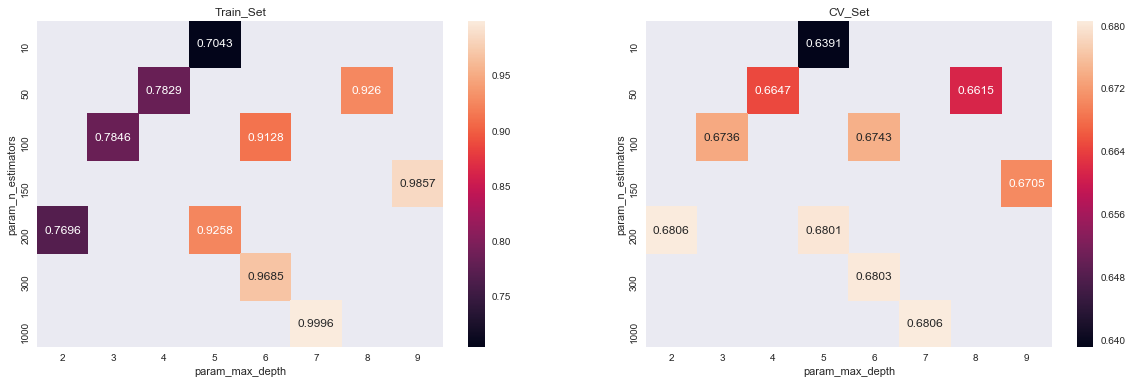

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.7519545413045845
0.6910041139549419


In [173]:
n_estimator,max_depth=find_Best_Kvalue(X_tra,X_te,y_test,y_train,'RandomizedSearchCV')

### Traing the model for best n_estimator and max_depth 

In [174]:
n_estimator,max_depth

(200, 2)

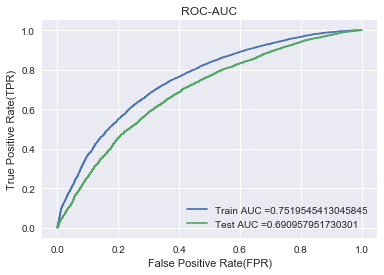

In [175]:
clf1, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_te,y_test,y_train,n_estimator,max_depth)

### Confusion Matrix on Train Set and Test Set

In [176]:
train_con,res_predictions_train = predict(y_train_pred,tr_thresholds,train_fpr,train_tpr)
test_con,res_predictions_test = predict(y_test_pred,tr_thresholds,test_fpr,test_tpr)
con_mat_train = confusion_matrix(y_train,train_con)
con_mat_test = confusion_matrix(y_test,test_con)

the maximum value of tpr*(1-fpr) 0.47507114066340334 for threshold 0.84
the maximum value of tpr*(1-fpr) 0.41680013366778806 for threshold 0.864


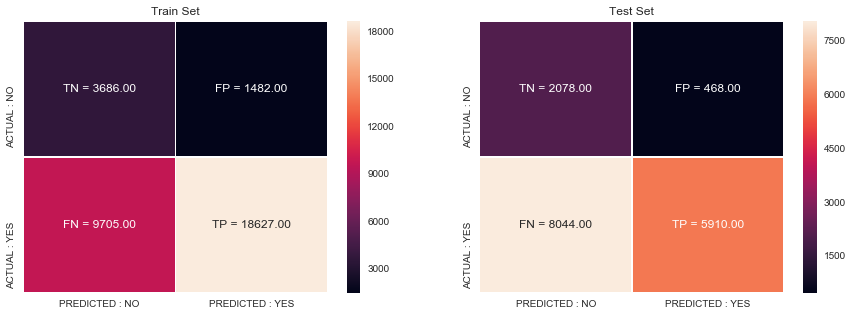

In [177]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_mat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_mat_test.flatten())])).reshape(2,2)
sns.heatmap(con_mat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_mat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

### 2.4.2 Applying GBDT on TFIDF,<font color='red'> SET 2</font>

In [178]:
X_tra = hstack((train_clean_categories, train_clean_subcategories, train_school_state, train_project_grade_category,
                train_teacher_prefix, price_standardized_train, quantity_standardized_train, ppt_standardized_train, twc_standardized_train,
                ewc_standardized_train, pos_standardized_train, neg_standardized_train, neu_standardized_train, com_standardized_train,title_tfidf_train,text_tfidf_train)).tocsr()
X_te = hstack((test_clean_categories, test_clean_subcategories, test_school_state, test_project_grade_category, 
               test_teacher_prefix,price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
               ewc_standardized_test, pos_standardized_test, neg_standardized_test, neu_standardized_test, com_standardized_test,title_tfidf_test,text_tfidf_test)).tocsr()


In [179]:
train_clean_categories.shape
print(type(title_tfidf_train))

<class 'scipy.sparse.csr.csr_matrix'>


In [180]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Shape of the Data matrix
(33500, 12120) (33500,)
(16500, 12120) (16500,)


### GBDT using GridsearchCV 

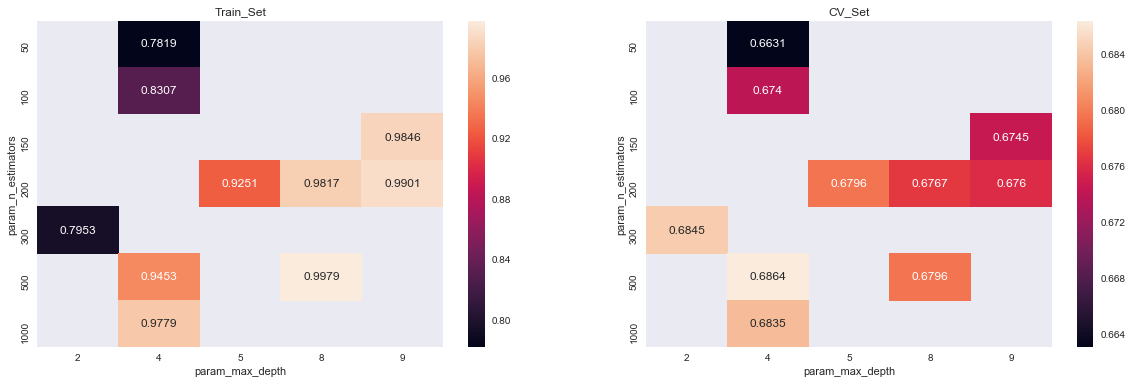

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.9196710115169142
0.7039591482326455


In [181]:
n_estimator,max_depth=find_Best_Kvalue(X_tra,X_te,y_test,y_train,'RandomizedSearchCV')

### Traing the model for best n_estimator and max_depth 

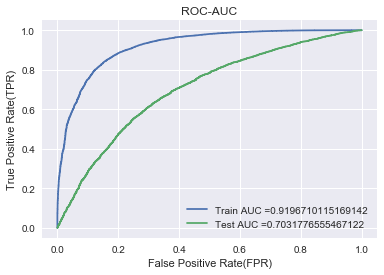

In [182]:
clf1, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_te,y_test,y_train,n_estimator,max_depth)

### Confusion Matrix on Train Set and Test Set

In [183]:
train_con,res_predictions_train = predict(y_train_pred,tr_thresholds,train_fpr,train_tpr)
test_con,res_predictions_test = predict(y_test_pred,tr_thresholds,test_fpr,test_tpr)
con_mat_train = confusion_matrix(y_train,train_con)
con_mat_test = confusion_matrix(y_test,test_con)

the maximum value of tpr*(1-fpr) 0.7116624054936405 for threshold 0.839
the maximum value of tpr*(1-fpr) 0.4333374128730232 for threshold 0.812


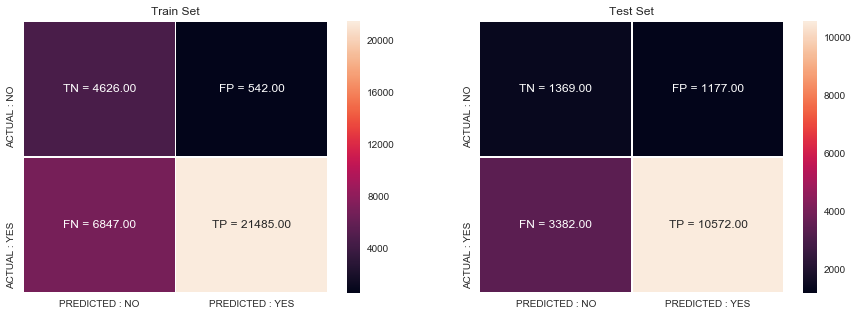

In [184]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_mat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_mat_test.flatten())])).reshape(2,2)
sns.heatmap(con_mat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_mat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

### 2.4.3 Applying GBDT on AVG W2V,<font color='red'> SET 3</font>

In [185]:
import numpy as np
avg_w2v_vectors_train_arr = np.array(avg_w2v_vectors_train)
avg_w2v_vectors_test_arr = np.array(avg_w2v_vectors_test)

avg_w2v_vectors_titles_train_arr = np.array(avg_w2v_vectors_titles_train)
avg_w2v_vectors_titles_test_arr = np.array(avg_w2v_vectors_titles_test)


X_tra = np.hstack((train_clean_categories, train_clean_subcategories, train_school_state, train_project_grade_category,
                train_teacher_prefix, price_standardized_train, quantity_standardized_train, ppt_standardized_train, twc_standardized_train,
                ewc_standardized_train, pos_standardized_train, neg_standardized_train, neu_standardized_train, com_standardized_train,
                avg_w2v_vectors_titles_train_arr,avg_w2v_vectors_train_arr))
X_te = np.hstack((test_clean_categories, test_clean_subcategories, test_school_state, test_project_grade_category, 
               test_teacher_prefix,price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
               ewc_standardized_test, pos_standardized_test, neg_standardized_test, neu_standardized_test, com_standardized_test,
               avg_w2v_vectors_titles_test_arr,avg_w2v_vectors_test_arr))


In [186]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Shape of the Data matrix
(33500, 619) (33500,)
(16500, 619) (16500,)


### GBDT using GridsearchCV 

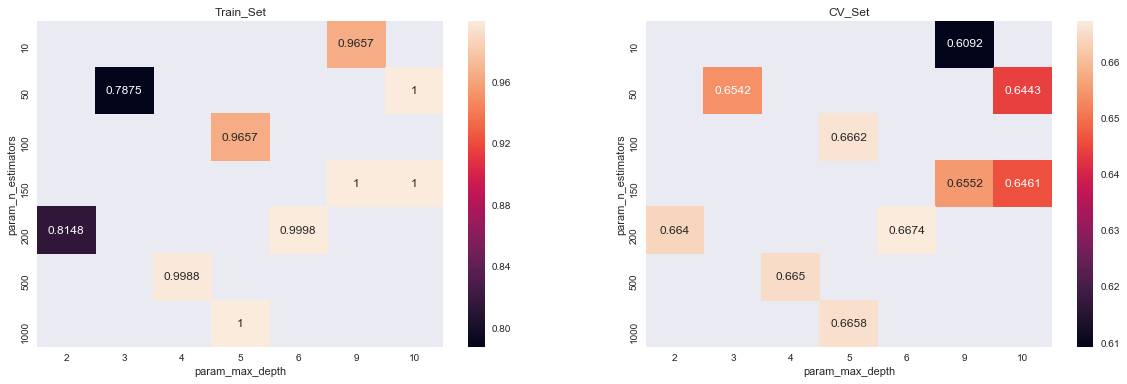

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.997808442989364
0.6797131152847518


In [187]:
till = 20000;
n_estimator,max_depth=find_Best_Kvalue(X_tra[:till,:],X_te[:till,:],y_test[:till],y_train[:till],'RandomizedSearchCV')

### Traing the model for best n_estimator and max_depth 

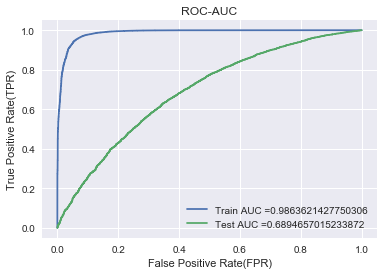

In [198]:
clf1, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra,X_te,y_test,y_train,n_estimator,max_depth)

### Confusion Matrix on Train Set and Test Set

In [199]:
y_train_pred.shape

(33500,)

In [200]:
train_con,res_predictions_train = predict(y_train_pred,tr_thresholds,train_fpr,train_tpr)
test_con,res_predictions_test = predict(y_test_pred,tr_thresholds,test_fpr,test_tpr)
con_mat_train = confusion_matrix(y_train,train_con)
con_mat_test = confusion_matrix(y_test,test_con)

the maximum value of tpr*(1-fpr) 0.8942897508598838 for threshold 0.849
the maximum value of tpr*(1-fpr) 0.41170748326816387 for threshold 0.633


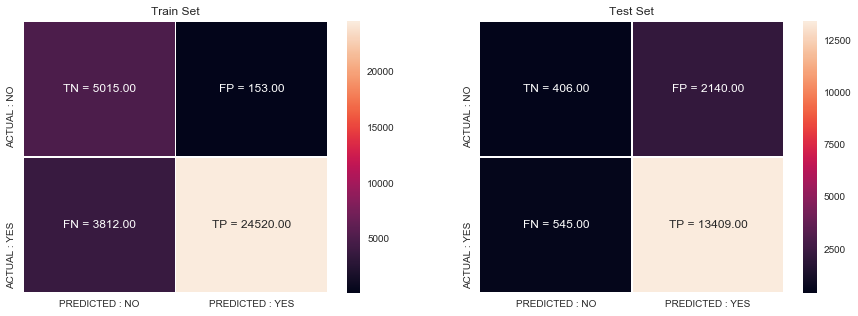

In [201]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_mat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_mat_test.flatten())])).reshape(2,2)
sns.heatmap(con_mat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_mat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

### 2.4.4 Applying GBDT on TFIDF W2V,<font color='red'> SET 4</font>

In [202]:
import numpy as np
tfidf_w2v_vectors_train_arr = np.array(tfidf_w2v_vectors_train)
tfidf_w2v_vectors_test_arr = np.array(tfidf_w2v_vectors_test)

tfidf_w2v_vectors_titles_train_arr = np.array(tfidf_w2v_vectors_titles_train)
tfidf_w2v_vectors_titles_test_arr = np.array(tfidf_w2v_vectors_titles_test)


X_tra = np.hstack((train_clean_categories, train_clean_subcategories, train_school_state, train_project_grade_category,
                train_teacher_prefix, price_standardized_train, quantity_standardized_train, ppt_standardized_train, twc_standardized_train,
                ewc_standardized_train, pos_standardized_train, neg_standardized_train, neu_standardized_train, com_standardized_train,
                   tfidf_w2v_vectors_titles_train_arr,tfidf_w2v_vectors_train_arr))
X_te = np.hstack((test_clean_categories, test_clean_subcategories, test_school_state, test_project_grade_category, 
               test_teacher_prefix,price_standardized_test, quantity_standardized_test, ppt_standardized_test, twc_standardized_test, 
               ewc_standardized_test, pos_standardized_test, neg_standardized_test, neu_standardized_test, com_standardized_test,
                  tfidf_w2v_vectors_titles_test_arr,tfidf_w2v_vectors_test_arr))


In [203]:
print("Final Shape of the Data matrix")
print(X_tra.shape, y_train.shape)
print(X_te.shape, y_test.shape)


Final Shape of the Data matrix
(33500, 619) (33500,)
(16500, 619) (16500,)


### GBDT using GridsearchCV 

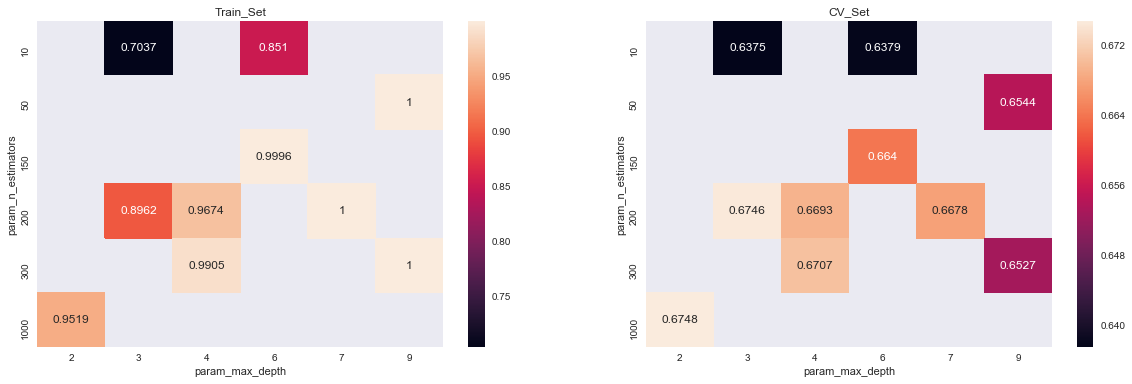

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.9081573578593679
0.6868948878263571


In [204]:
till = 20000
n_estimator,max_depth=find_Best_Kvalue(X_tra[:till,:],X_te[:till,:],y_test[:till],y_train[:till],'RandomizedSearchCV')

### Traing the model for best n_estimator and max_depth 

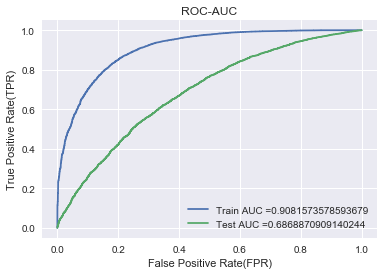

In [205]:
clf1, te_thresholds, test_tpr, test_fpr, y_test_pred, y_train_pred, tr_thresholds, train_fpr, train_tpr = BestModel(X_tra[:till,:],X_te[:till,:],y_test[:till],y_train[:till],n_estimator,max_depth)

### Confusion Matrix on Train Set and Test Set

In [206]:
train_con,res_predictions_train = predict(y_train_pred,tr_thresholds,train_fpr,train_tpr)
test_con,res_predictions_test = predict(y_test_pred,tr_thresholds,test_fpr,test_tpr)
con_mat_train = confusion_matrix(y_train[:till],train_con)
con_mat_test = confusion_matrix(y_test[:till],test_con)

the maximum value of tpr*(1-fpr) 0.682185351692345 for threshold 0.844
the maximum value of tpr*(1-fpr) 0.4050904661382631 for threshold 0.758


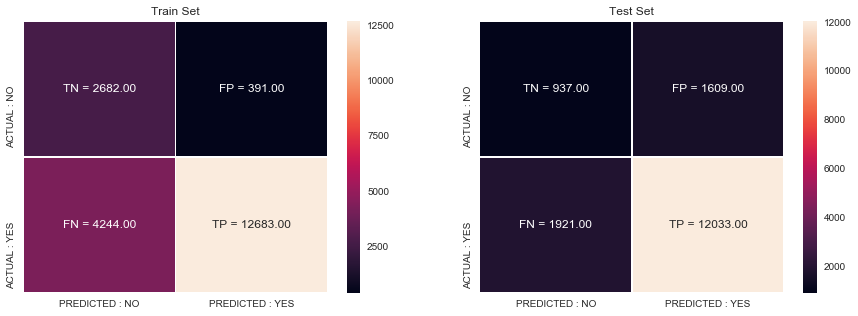

In [207]:
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_mat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_mat_test.flatten())])).reshape(2,2)
sns.heatmap(con_mat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_mat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

<h1>3. Conclusions</h1>

In [209]:
# Please compare all your models using Prettytable library

# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer Used", "Model", "n_estimators","max_depth", "AUC-Score"]

x.add_row(["BOW", "Random Forest", 500,10, 0.69])
x.add_row(["TFIDF", "Random Forest", 500,10, 0.70])
x.add_row(["AVG W2V", "Random Forest", 500,5, 0.67])
x.add_row(["TFIDF W2V", "Random Forest",1000,6, 0.67])

x.add_row(["BOW", "Gradient Boosting Decision Tree", 200,2, 0.69])
x.add_row(["TFIDF", "Gradient Boosting Decision Tree", 500,4, 0.70])
x.add_row(["AVG W2V", "Gradient Boosting Decision Tree", 200,6, 0.69])
x.add_row(["TFIDF W2V", "Gradient Boosting Decision Tree", 1000,2, 0.69])

print(x)

+-----------------+---------------------------------+--------------+-----------+-----------+
| Vectorizer Used |              Model              | n_estimators | max_depth | AUC-Score |
+-----------------+---------------------------------+--------------+-----------+-----------+
|       BOW       |          Random Forest          |     500      |     10    |    0.69   |
|      TFIDF      |          Random Forest          |     500      |     10    |    0.7    |
|     AVG W2V     |          Random Forest          |     500      |     5     |    0.67   |
|    TFIDF W2V    |          Random Forest          |     1000     |     6     |    0.67   |
|       BOW       | Gradient Boosting Decision Tree |     200      |     2     |    0.69   |
|      TFIDF      | Gradient Boosting Decision Tree |     500      |     4     |    0.7    |
|     AVG W2V     | Gradient Boosting Decision Tree |     200      |     6     |    0.69   |
|    TFIDF W2V    | Gradient Boosting Decision Tree |     1000     |  